<a href="https://colab.research.google.com/github/Karthi-2-2/PROJECT/blob/main/PROJECT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Load & Manipulate Data
import pandas as pd

df=pd.read_csv("/content/california_housing.csv")
df.head()

df.rename(columns={
    "MedInc": "Income",
    "HouseAge": "Age",
    "AveRooms": "Rooms",
    "AveBedrms": "Bedrooms",
    "Population": "Population",
    "AveOccup": "Occupancy",
    "Latitude": "Latitude",
    "Longitude": "Longitude",
    "MedHouseVal": "Price"
  },inplace=True)

df.shape
df.isnull().sum()
df.dropna(inplace=True)


In [ ]:
df.describe()

,Income,Age,Rooms,Bedrooms,Population,Occupancy,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


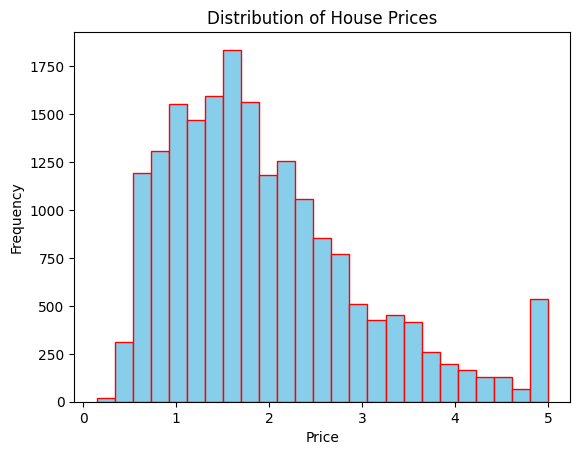

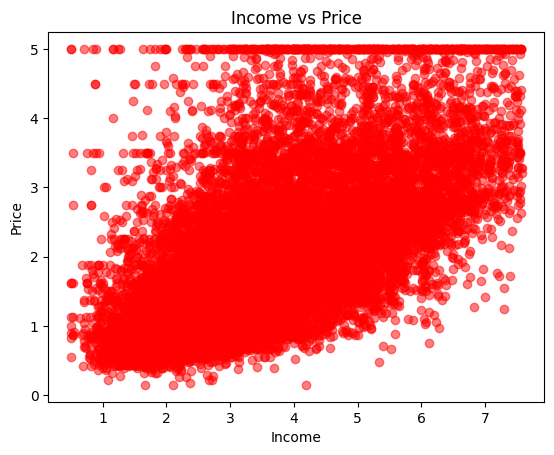

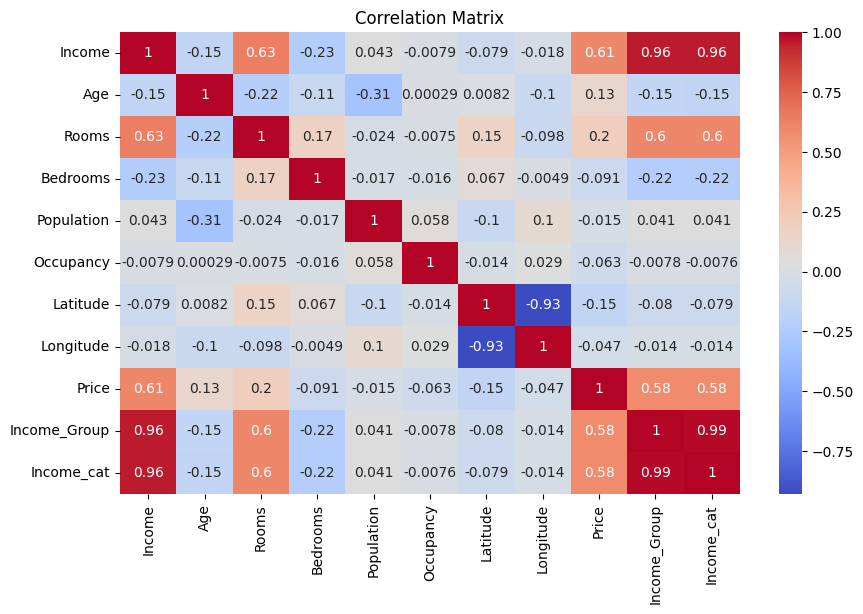

In [ ]:
#Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(df["Price"],bins=25,color="skyblue",edgecolor="red")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of House Prices")
plt.show()

plt.scatter(df["Income"],df["Price"],color="red",alpha=0.5)
plt.xlabel("Income")
plt.ylabel("Price")
plt.title("Income vs Price")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

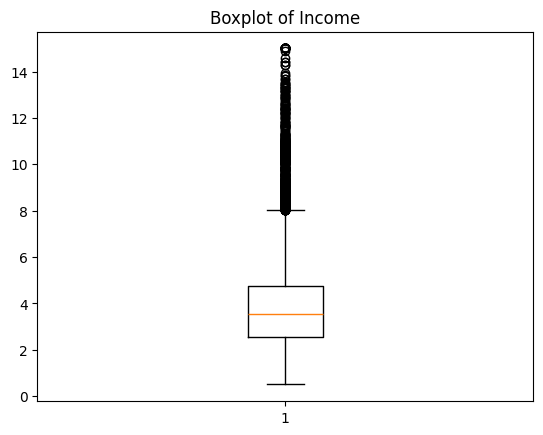

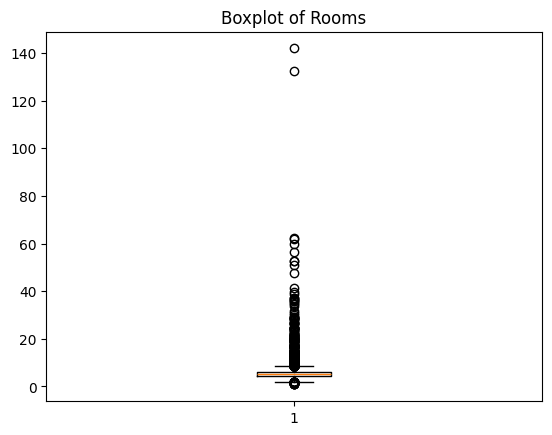

In [ ]:
#Preprocessing & Outlier Detection
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

plt.boxplot(df["Income"])
plt.title("Boxplot of Income")
plt.show()

plt.boxplot(df["Rooms"])
plt.title("Boxplot of Rooms")
plt.show()


In [ ]:
def remove_outliers(df, col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  return df[(df[col] >= Q1 - 1.5*IQR) & (df[col] <= Q3 + 1.5*IQR)]

df = remove_outliers(df, "Income")
df = remove_outliers(df, "Rooms")

In [ ]:
#Train Test
from sklearn.model_selection import train_test_split
X = df.drop("Price", axis=1)
y = df["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df["Income_Group"] = pd.cut(df["Income"], bins=5, labels=False)

X = df.drop(["Price", "Income_Group"], axis=1)
y = df["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=df["Income_Group"], random_state=42)



In [ ]:
#Regression Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df[["Income"]]
y = df["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
simple_model = LinearRegression()
simple_model.fit(X_train, y_train)
y_pred_simple = simple_model.predict(X_test)
simple_r2 = r2_score(y_test, y_pred_simple)

X = df.drop("Price", axis=1)
y = df["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)
y_pred_multi = multi_model.predict(X_test)
multi_r2 = r2_score(y_test, y_pred_multi)

print("Simple Regression R²:", simple_r2)
print("Multiple Regression R²:", multi_r2)


Simple Regression R²: 0.45885918903846656
Multiple Regression R²: 0.5757877060324508


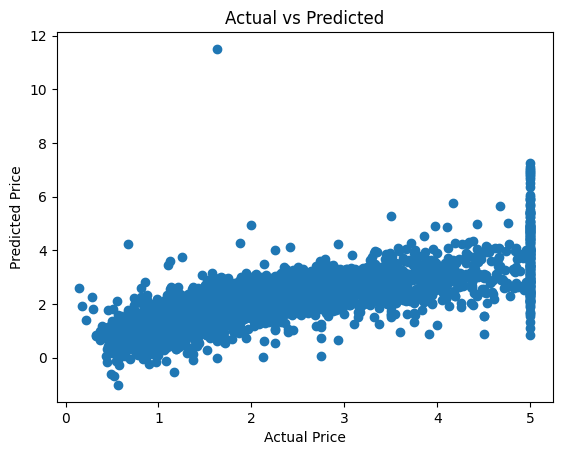

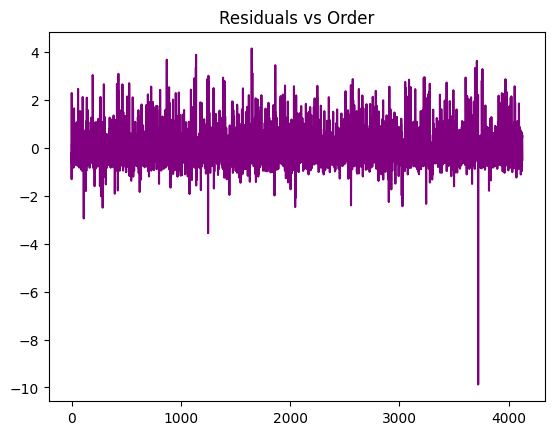

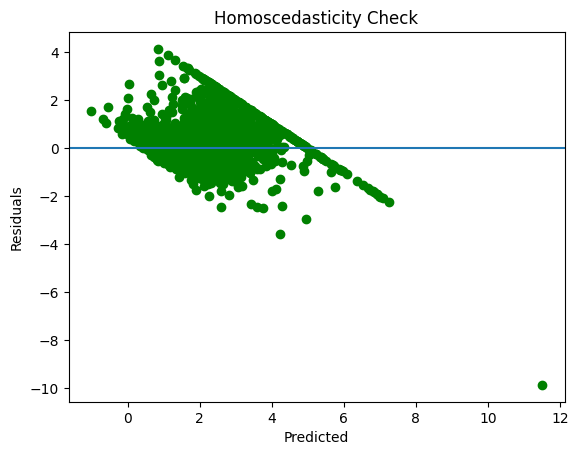

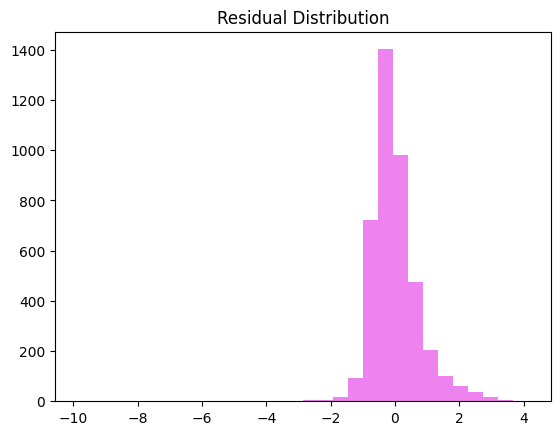

In [ ]:
#Check Regression Assumptions

y_pred = multi_model.predict(X_test)
residuals = y_test - y_pred

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.show()

plt.plot(residuals.values, color="purple")
plt.title("Residuals vs Order")
plt.show()

plt.scatter(y_pred, residuals,color="green")
plt.axhline(0)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check")
plt.show()

plt.hist(residuals, bins=30, color="violet")
plt.title("Residual Distribution")
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R2:", r2)


Mean Absolute Error: 0.5332001304956557
Mean Squared Error: 0.5558915986952444
Root Mean Squared Error: 0.7455813830127764
R2: 0.5757877060324508
